In [4]:
goodsubjects=[4,7,11,14,16,23,24,25]

with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
sub_list = [line.strip() for line in sub_list]

good_subjects_list=[]
for gs in goodsubjects:
    good_subjects_list.append(sub_list[gs])

with open('good_pilots_ru_dm_list.txt', 'w') as f:
    for item in good_subjects_list:
        # write each string to the file with a newline character at the end
        f.write("%s\n" % item)

In [1]:
with open('good_pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]

good_subjects_list

['NDARHJ830RXD',
 'NDARVB897AH1',
 'NDARFA402LMW',
 'NDARUX340FYC',
 'NDARJG687YYX',
 'NDARVD194JX2',
 'NDARVR601FUT',
 'NDARUL694GYN']

In [ ]:
# figure out all runs to run and run them

In [ ]:
# delay7:
# auditory roi
# good subjects

# cochresnet50 (mean) X

# cochresnet50PCA1-200 X

# cochresnet50PCAc2 X


# cochresnet50PCAlocal1,10 X

# cochresnet50fullPCA1-200 X

# cochresnet50PCAlocalrev1,5 X

# cochresnet50TxT X

# manual (resampled) X
# manualmean //hrf? X

# manualLowLevel X
# manualAudioSet X

# manualPCA1
# manualPCA10

In [24]:
def load_audio_features_PCA_new_full_rev(stim,all_layers,n_components):
    #this method does not take the mean across time so it is large!
    from sklearn.decomposition import PCA
    transformer = PCA(n_components=n_components)
    #dimensionality reduction to 50 components
    #transformer = SparseRandomProjection(n_components=50)
    save_features_dir = f'../data/{stim}_clips_cochresnet50/'

    #get the time dimension of each layer
    all_layers_time_shape=[]
    file = h5py.File(f'{save_features_dir}cochresnet50_activations.h5', 'r')
    for layer in all_layers:
        all_layers_time_shape.append(file[layer].shape[1])
    
    X=[]
    file = h5py.File(f'{save_features_dir}cochresnet50_activations_full.h5', 'r')
    for l,layer in enumerate(all_layers):
        print(l,layer)
        data = file[layer]
        data=np.asanyarray(data)
        data=np.reshape(data, (data.shape[0],all_layers_time_shape[l],-1))
        print('input=',data.shape)
        X_pca=[]
        for x_i in np.arange(data.shape[0]):
            #X_pca.append(np.mean ( transformer.fit_transform(data[x_i,:,:].T).T  ,axis=1) )
            #xx=np.mean( transformer.fit_transform(data[x_i,:,:].T).T  ,axis=1)
            X_pca.append(transformer.fit_transform(data[x_i,:,:]))

        X_pca=np.asanyarray(X_pca)
        print('after mean()=',X_pca.shape)
        X_pca=np.reshape(X_pca, (X_pca.shape[0],-1))
        #X.append(  X_pca[:(-1*delay),:]   )
        X.append(  X_pca   )
        print('after flatten=',X_pca.shape)

    file.close()
    return(X)

In [4]:
def load_audio_features_TxT(stim,all_layers):
    #this method does not take the mean across time so it is large!
    #dimensionality reduction to 50 components
    #transformer = SparseRandomProjection(n_components=50)
    save_features_dir = f'../data/{stim}_clips_cochresnet50/'
    #get the time dimension of each layer
    all_layers_time_shape=[]
    file = h5py.File(f'{save_features_dir}cochresnet50_activations.h5', 'r')
    for layer in all_layers:
        all_layers_time_shape.append(file[layer].shape[1])
    
    X=[]
    file = h5py.File(f'{save_features_dir}cochresnet50_activations_full.h5', 'r')
    for l,layer in enumerate(all_layers):
        print(l,layer)
        data = file[layer]
        data=np.asanyarray(data)
        # data=np.reshape(data, (data.shape[0],all_layers_time_shape[l],-1))
        print('input=',data.shape)
        #print(np.corrcoef(data).shape)

        X.append(np.corrcoef(data))
        # print('after flatten=',_.shape)

    file.close()
    return(X)

In [2]:
#cochresnet50PCAc2
import nat_asd_utils
from sklearn.decomposition import PCA
import numpy as np
import h5py



features=['input_after_preproc',
                    'conv1_relu1',
                    'maxpool1',
                    'layer1',
                    'layer2',
                    'layer3',
                    'layer4',
                    'avgpool']
# X=nat_asd_utils.load_audio_features('DM',features)
# X,features=pilot.load_features('cochresnet50pcac2')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [5]:
features=['input_after_preproc',
                    'conv1_relu1',
                    'maxpool1',
                    'layer1',
                    'layer2',
                    'layer3',
                    'layer4',
                    'avgpool']
X=load_audio_features_TxT('DM',features)

with h5py.File(f'../data/features/DM_cochresnet50_activations-full_TxT.hdf5', 'w') as f:
        for i, layer in enumerate(features):
            f.create_dataset(layer, data=X[i])

0 input_after_preproc
input= (749, 82290)
1 conv1_relu1
input= (749, 1322880)
2 maxpool1
input= (749, 332416)
3 layer1
input= (749, 1329664)
4 layer2
input= (749, 677376)
5 layer3
input= (749, 358400)
6 layer4
input= (749, 186368)
7 avgpool
input= (749, 2048)


In [1]:
features=['input_after_preproc',
 'conv1_relu1',
 'maxpool1',
 'layer1',
 'layer2',
 'layer3',
 'layer4']

for n_components in [1,5]:
    print(n_components)
    X=load_audio_features_PCA_new_full_rev('DM',features,n_components)
    with h5py.File(f'../data/features/DM_cochresnet50_activations-full_PCA-local-{n_components}_rev.hdf5', 'w') as f:
        for i, layer in enumerate(all_layers):
            f.create_dataset(layer, data=X[i])

1


NameError: name 'load_audio_features_PCA_new_full_rev' is not defined

In [1]:
# set up HRF, prove it is good
import hrf_tools
from scipy.signal import resample
import matplotlib.pyplot as plt
import numpy as np
import nat_asd_utils

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
stim='DM'
features=['rms','chroma', 'mfcc', 'mfs', 'as_embed', 'as_scores']
X=nat_asd_utils.load_audio_features_manual_hrf(stim,features)


In [6]:
import pilot
X,features=pilot.load_features('manual')
for x in X:
    print(x.shape)

(750, 1)
(750, 12)
(750, 13)
(750, 128)
(750, 1024)
(750, 521)


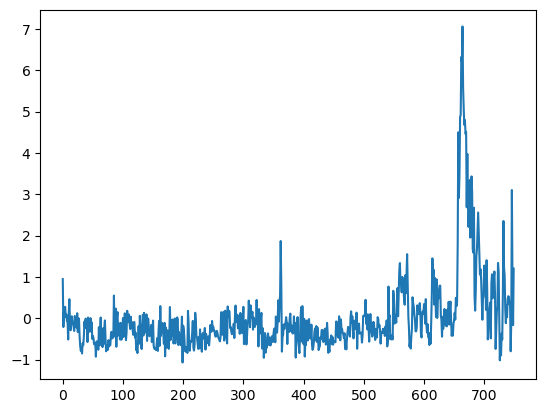

In [5]:
import matplotlib.pyplot as plt
plt.plot(X[0])


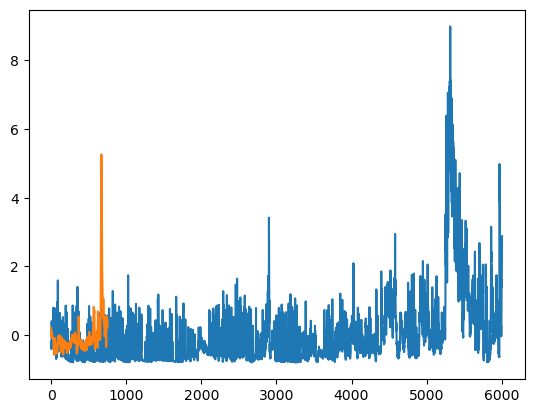

In [58]:
featplot=0
plt.plot(feature_raw[:,featplot])
plt.plot(feature[:,featplot])

In [ ]:
# set up time x time feature

In [ ]:
# check demographics of bad subjects

In [5]:
#set up PCA in other direction feature

In [ ]:
#double check PCA is being performed correctly..